# Assignment 2: Wisconsin Cancer Data Set

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB

In [25]:
data = pd.read_csv('wisconsin_data.csv')
data.head()
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

## Data Preprocessing

In [26]:
data = data.drop(columns = ['id', 'Unnamed: 32'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
def binarize(label):
    return 0 if label == 'M' else 1

In [28]:
data['binary_label'] = data['diagnosis'].apply(binarize)
data = data.drop(columns = ['diagnosis'])
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,binary_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != 'binary_label'):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [30]:
data = normalize(data)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,binary_label
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = ['binary_label']), data['binary_label'], stratify = data['binary_label'], test_size = 0.2, random_state = 5)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


## Effect of solver

### newton-cg

In [32]:
newton_lr = LogisticRegression(solver = 'newton-cg')
newton_lr.fit(x_train,y_train)
newton_lr_pred = newton_lr.predict(x_test)
newton_lr_acc = accuracy_score(y_test,newton_lr_pred)

### lbfgs

In [33]:
lbfgs_lr = LogisticRegression(solver="lbfgs")
lbfgs_lr.fit(x_train,y_train)
lbfgs_lr_pred = lbfgs_lr.predict(x_test)
lbfgs_lr_acc = accuracy_score(y_test,lbfgs_lr_pred)

### liblinear

In [34]:
liblinear_lr = LogisticRegression(solver="liblinear")
liblinear_lr.fit(x_train,y_train)
liblinear_lr_pred = liblinear_lr.predict(x_test)
liblinear_lr_acc = accuracy_score(y_test,liblinear_lr_pred)

### Comparison

In [35]:
result_solver = pd.DataFrame(list(zip(list(x_test.columns),list(newton_lr.coef_[0]),list(lbfgs_lr.coef_[0]),list(liblinear_lr.coef_[0]))),columns=['Property','newton-cg','lbfgs','liblinear'])
acc_row = {"Property": 'accuracy','newton-cg':newton_lr_acc,'lbfgs':lbfgs_lr_acc,'liblinear':liblinear_lr_acc}
result_solver = result_solver.append(acc_row,ignore_index=True)
result_solver

,Property,newton-cg,lbfgs,liblinear
0,radius_mean,-1.849841,-1.849810,-0.832528
1,texture_mean,-1.538316,-1.538246,-0.835428
2,perimeter_mean,-1.816324,-1.816294,-0.898187
3,area_mean,-1.571202,-1.571283,-1.144875
4,smoothness_mean,-0.568305,-0.568468,0.343165
5,compactness_mean,-0.341677,-0.341652,-0.392631
6,concavity_mean,-1.298667,-1.298718,-1.721120
7,concave points_mean,-1.996599,-1.996702,-2.375434
8,symmetry_mean,-0.491447,-0.491486,0.313646
9,fractal_dimension_mean,1.010360,1.010267,1.549972


## Effect of penalty

### l1

In [36]:
l1_lr = LogisticRegression(penalty= 'l1',solver='saga')
l1_lr.fit(x_train,y_train)
l1_lr_pred = l1_lr.predict(x_test)
l1_lr_acc = accuracy_score(y_test,l1_lr_pred)

/home/kushagra/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### l2

In [37]:
l2_lr = LogisticRegression(penalty='l2',solver='saga')
l2_lr.fit(x_train,y_train)
l2_lr_pred = l2_lr.predict(x_test)
l2_lr_acc = accuracy_score(y_test,l2_lr_pred)

### none

In [38]:
none_lr = LogisticRegression(penalty="none",solver='saga')
none_lr.fit(x_train,y_train)
none_lr_pred = none_lr.predict(x_test)
none_lr_acc = accuracy_score(y_test,none_lr_pred)

/home/kushagra/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Comparison

In [39]:
result_penalty = pd.DataFrame(list(zip(list(x_test.columns),list(l1_lr.coef_[0]),list(l2_lr.coef_[0]),list(none_lr.coef_[0]))),columns=['Property','l1','l2','none'])
acc_row = {"Property": 'accuracy','l1':l1_lr_acc,'l2':l2_lr_acc,'none':none_lr_acc}
result_penalty = result_penalty.append(acc_row,ignore_index=True)
result_penalty

,Property,l1,l2,none
0,radius_mean,-0.846210,-1.847163,-1.321885
1,texture_mean,-0.104885,-1.537123,-3.676625
2,perimeter_mean,-0.539208,-1.813966,-1.402746
3,area_mean,0.000000,-1.570469,-2.873835
4,smoothness_mean,0.000000,-0.566237,-0.113594
5,compactness_mean,0.000000,-0.342329,2.215772
6,concavity_mean,0.000000,-1.300278,-4.743289
7,concave points_mean,-3.891066,-1.998634,-6.432054
8,symmetry_mean,0.000000,-0.489736,0.316745
9,fractal_dimension_mean,0.000000,1.012038,4.754477


## Vary the l1 penalty over the range

In [40]:
reg = [0.1, 0.25, 0.75, 0.9, 10/9, 4/3, 4, 10]
exp_c = []
exp_a = []
for c in reg :
    model = LogisticRegression(penalty='l1',solver='liblinear',C= c)
    model.fit(x_train,y_train)
    model_y_pred = model.predict(x_test)
    exp_c.append(list(model.coef_[0]))
    exp_a.append(accuracy_score(y_test,model_y_pred))

In [41]:
head = list(x_test.columns)
head.append('accuracy')
l1_test = pd.DataFrame(columns=head)
for i in range(exp_c.__len__()):
    exp_c[i].append(exp_a[i])
    l1_test.loc[len(l1_test.index)] = exp_c[i]
l1_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,accuracy
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.632526,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,-4.261763,0.000000,0.0,0.964912
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-1.379599,0.0,0.000000,...,-0.610336,0.0,0.0,0.000000,0.0,0.000000,-5.406198,0.000000,0.0,0.964912
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-3.081742,0.0,0.000000,...,-3.826776,0.0,0.0,0.000000,0.0,0.000000,-6.173952,0.000000,0.0,0.973684
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-3.356999,0.0,0.000000,...,-4.321440,0.0,0.0,0.000000,0.0,0.000000,-6.373697,0.000000,0.0,0.973684
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-3.757065,0.0,0.000000,...,-4.840040,0.0,0.0,-0.248317,0.0,0.000000,-6.245173,-0.302157,0.0,0.964912
5,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-4.125967,0.0,0.000000,...,-5.249504,0.0,0.0,-0.702237,0.0,-0.072580,-5.862062,-0.642778,0.0,0.964912
6,0.0,-0.981306,0.0,0.0,0.0,0.000000,0.0,-4.387944,0.0,2.919935,...,-6.715481,0.0,0.0,-3.658311,0.0,-4.307108,-5.413119,-2.714200,0.0,0.973684
7,0.0,0.000000,0.0,0.0,0.0,3.565614,0.0,-7.242106,0.0,1.965702,...,-11.013821,0.0,0.0,-4.850907,0.0,-7.614913,-5.815012,-4.513094,0.0,0.982456


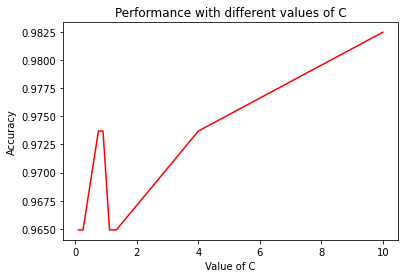

In [42]:
plt.title('Performance with different values of C')
plt.ylabel('Accuracy')
plt.xlabel('Value of C')
plt.plot(reg, exp_a, color = 'red')
plt.show()

## Gaussian NB

In [43]:
gnb = GaussianNB()
results = cross_validate(gnb, x_train, y_train, cv= 5)
results

{'fit_time': array([0.03374481, 0.01290011, 0.01069331, 0.01637793, 0.01642537]),
 'score_time': array([0.0082202 , 0.00670195, 0.00968122, 0.01436114, 0.00844908]),
 'test_score': array([0.92307692, 0.92307692, 0.95604396, 0.92307692, 0.94505495])}

In [44]:
print(np.mean(results['test_score']))

0.9340659340659341


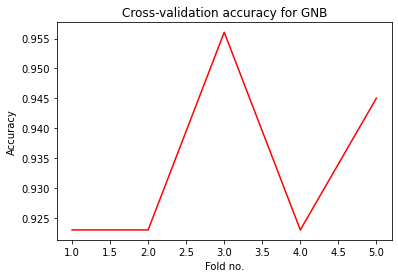

In [45]:
plt.title('Cross-validation accuracy for GNB')
plt.ylabel('Accuracy')
plt.xlabel('Fold no.')
plt.plot([i for i in range(1, 6)], results['test_score'], color = 'red')
plt.show()